## Project description

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data

    Ticket #: Ticket number assigned to each complaint
    Customer Complaint: Description of complaint
    Date: Date of complaint
    Time: Time of complaint
    Received Via: Mode of communication of the complaint
    City: Customer city
    State: Customer state
    Zipcode: Customer zip
    Status: Status of complaint
    Filing on behalf of someone


In [7]:
#import dataset
data = pd.read_csv('Comcast_telecom_complaints_data.csv')
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


### Provide the trend chart for the number of complaints at monthly and daily granularity levels


In [20]:
#Convert date string format to date format
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].head()

0   2015-04-22
1   2015-04-08
2   2015-04-18
3   2015-05-07
4   2015-05-26
Name: Date, dtype: datetime64[ns]

In [26]:
#Create Month column 
data['Month'] = data['Date'].apply(lambda x:x.month)
data['Month'].head()

0    4
1    4
2    4
3    5
4    5
Name: Month, dtype: int64

6    1280
4     545
5     399
Name: Month, dtype: int64


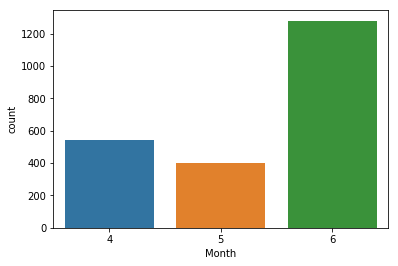

In [46]:
#No of complaints in month
print(data['Month'].value_counts())
sns.countplot(x='Month',data=data)

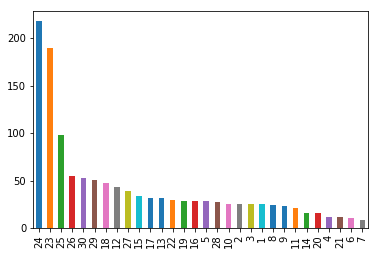

In [47]:
#Seems more compaint in June months
data['Day'] = data['Date'].apply(lambda x:x.day)
data[data['Month'] == 6]['Day'].value_counts().plot(kind='bar')

In [53]:
# which date max/min complaint has been done
print('Max no of complaint date is',data.groupby('Date').count().idxmax()['Customer Complaint'])

print('Min no of complaint date is',data.groupby('Date').count().idxmin()['Customer Complaint'])


Max no of complaint date is 2015-06-24 00:00:00
Min no of complaint date is 2015-04-11 00:00:00


### Provide a table with the frequency of complaint types, Which complaint types are maximum i.e., around internet, network issues, or across any other domains.- 

In [61]:
def get_complaint_type(complaint):
    if 'internet' in complaint:
        return 'around internet'
    elif 'network' in complaint or 'interruption' in complaint:
        return 'network issues'
    elif 'billing' in complaint or 'charging' in complaint:
        return 'billing issues'
    else:
        return complaint
        
        
data['Complaint Type'] = [get_complaint_type(item.lower()) for item in data['Customer Complaint']]

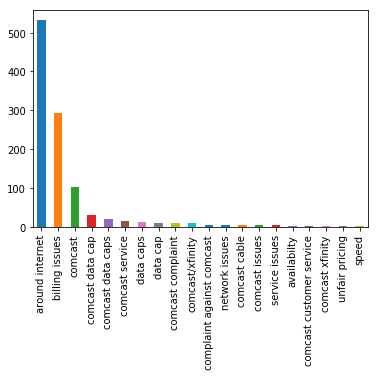

In [68]:
data['Complaint Type'].value_counts().head(20).plot(kind='bar')

###  Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.


In [69]:
def get_status(status):
    if status == 'Open' or status == 'Pending':
        return 'Open'
    elif status == 'Closed' or status == 'Solved':
        return 'Closed'
    else:
        return status

data['Status Category'] = [get_status(item) for item in data['Status']]

In [72]:
print(data['Status Category'].head())
print(data['Status Category'].value_counts())

0    Closed
1    Closed
2    Closed
3      Open
4    Closed
Name: Status Category, dtype: object
Closed    1707
Open       517
Name: Status Category, dtype: int64


### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:-
    Which state has the maximum complaints-
    Which state has the highest percentage of unresolved complaints

            Open  Closed
State                   
Alabama        9      17
Arizona        6      14
Arkansas       0       6
California    61     159
Colorado      22      58


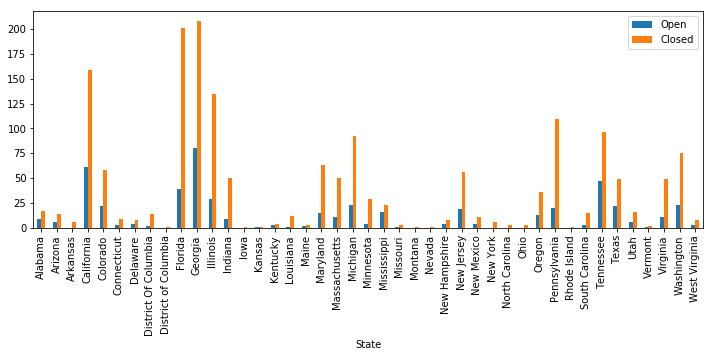

In [127]:
data1 = data.groupby('State').count()
open_list = []
close_list=[]
for item in data.groupby("State").groups:
    open_list.append(data[(data['State'] == item) & (data['Status Category'] == 'Open')].count()[0])
    close_list.append(data[(data['State'] == item) & (data['Status Category'] == 'Closed')].count()[0])


data1['Open'] = open_list
data1['Closed'] = close_list
ts = data1[['Open', 'Closed']]
print(ts.head())
ts.plot(kind='bar',figsize=(12,4))


Max complaint state is Georgia


Text(0.5, 1.0, 'State wise complaint count')

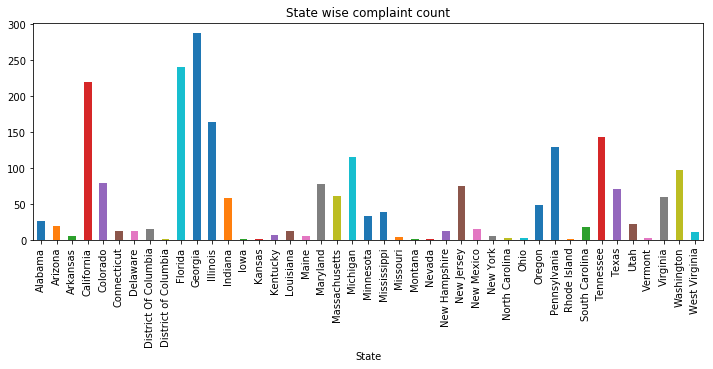

In [99]:
#Which state has the maximum complaints-
data1 = data.groupby('State').count()
print('Max complaint state is',data1[data1['Customer Complaint'] == data1['Customer Complaint'].max()].index[0])

data1['Customer Complaint'].plot(kind='bar', figsize=(12,4))
plt.title('State wise complaint count')

Text(0.5, 1.0, 'Unresolved Complaint')

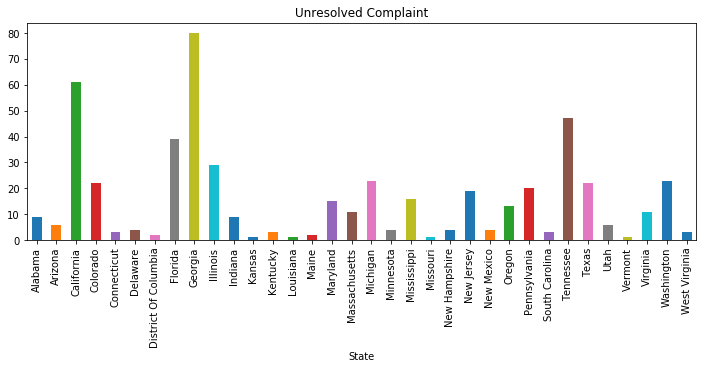

In [136]:
#Which state has the highest percentage of unresolved complaints
data[data['Status Category'] == 'Open'].groupby('State').count()['Complaint Type'].plot(kind='bar', figsize=(12,4))
plt.title('Unresolved Complaint')

In [137]:
pct_unresolved = ts['Open']/(ts['Open'] +ts['Closed'])
print(pct_unresolved.idxmax(), pct_unresolved.max())

Kansas 0.5


Text(0.5, 1.0, 'Percentage of unresoved complaint')

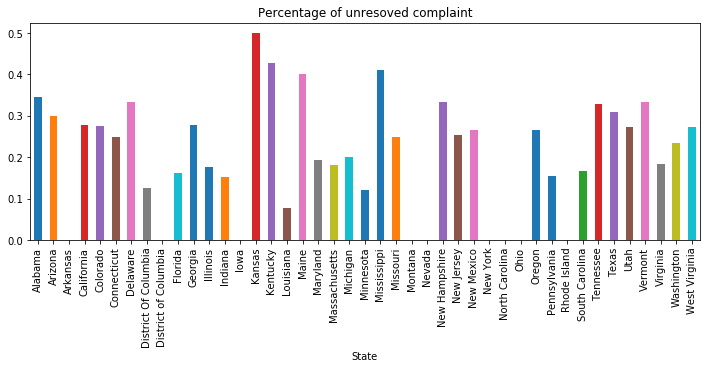

In [142]:
pct_unresolved.plot(kind='bar', figsize=(12,4))
plt.title('Percentage of unresoved complaint')